# Assignment 3

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [101]:
local_img_path = 'tree_image.jpeg'

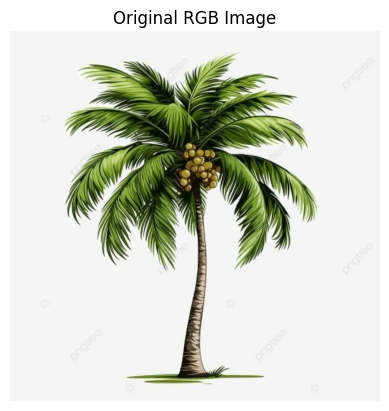

In [102]:
img_bgr = cv2.imread(local_img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

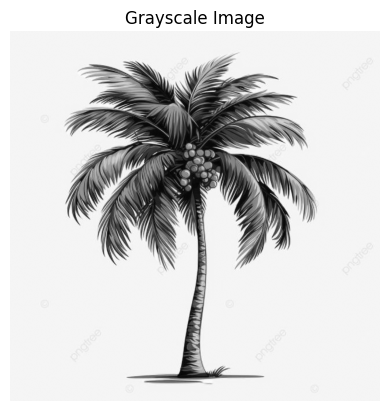

In [103]:
rgb_float = img_rgb.astype(np.float32)

# Grayscale Image 
weights = np.array([0.299, 0.587, 0.114], dtype=np.float32)
gray_np = np.clip(np.dot(rgb_float, weights), 0, 255).astype('uint8')

gray = gray_np.astype(np.uint8)

plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

### Part A
Task 1 - Convolution
- Write a function convolve(img, kernel) Hint : Lookup np.pad function for padding and research how it works. It takes different modes, one that we want to use is reflect Also, learn what exactly * does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

In [104]:
def convolve(img, kernel):
    img = img.astype(np.float32)
    kernel = kernel.astype(np.float32)

    kH, kW = kernel.shape
    pad_h = kH // 2
    pad_w = kW // 2

    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            patch = padded_img[i:i+kH, j:j+kW]

            # '*' means here element-wise multiplication
            output[i, j] = np.sum(patch * kernel)

    return output

Task 2 — Average Blur
* Implement a function average_blur_gray(img, ksize) using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)
- Repeat for RGB:
* Apply the kernel on each channel separately.

In [105]:
def average_blur_gray(img, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32)
    kernel /= (ksize * ksize)  
    # Here I have normalized it becuase it makes the average value = 1
    
    blurred = convolve(img, kernel)
    return np.clip(blurred, 0, 255).astype(np.uint8)


- As we know larger the ksize, stronger is the blurr.
- Also one thing I can notice that Edges become softer because:
Each pixel is influenced by neighbors & less high freq. details

In [106]:
def average_blur_rgb(img_rgb, ksize):
    output = np.zeros_like(img_rgb)

    for c in range(3):
        output[:, :, c] = average_blur_gray(img_rgb[:, :, c], ksize)

    return output

 Task 3 - Gaussian Blur
- Implement a Gaussian kernel generator: The function signature should be gaussian_kernel(ksize, sigma) It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

* Convolve it with:
* Gray image
* Each RGB channel
* And, then display all results along with the original image.

 Solution - I am using the expression for Gaussian Probability distribution function

In [107]:
def gaussian_kernel(ksize, sigma):
    ax = np.arange(-ksize//2 + 1., ksize//2 + 1.)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    kernel /= np.sum(kernel)   

    return kernel


In [108]:
def gaussian_blur_gray(img, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma)
    
    blurred = convolve(img, kernel)
    return np.clip(blurred, 0, 255).astype(np.uint8)


In [109]:
def gaussian_blur_rgb(img_rgb, ksize, sigma):
    output = np.zeros_like(img_rgb)

    for c in range(3):
        output[:, :, c] = gaussian_blur_gray(img_rgb[:, :, c], ksize, sigma)

    return output


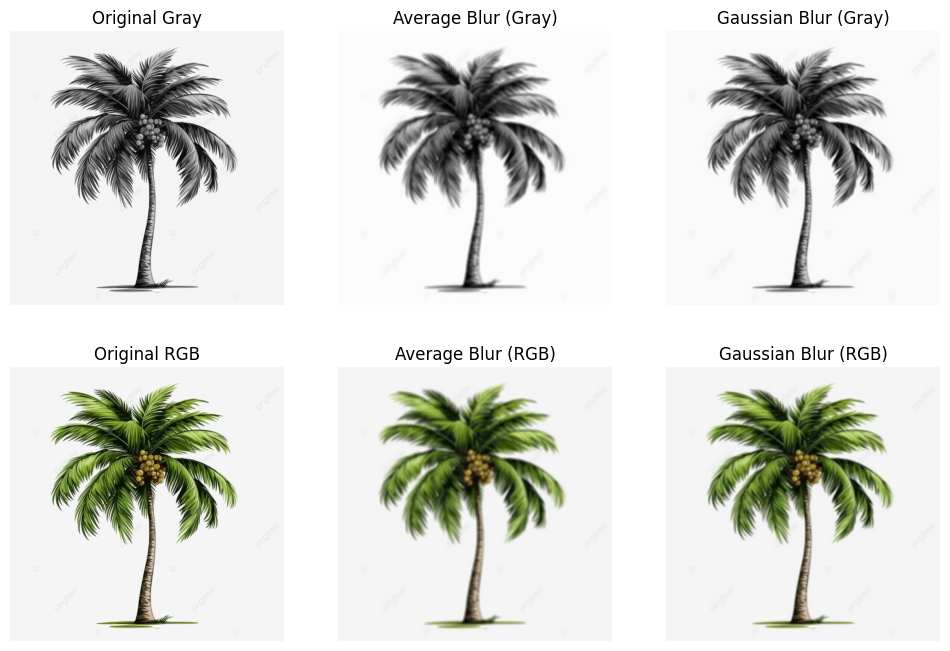

In [110]:
ksize = 7
sigma = 1.5

average_gray = average_blur_gray(gray_np, ksize)
average_rgb = average_blur_rgb(img_rgb, ksize)

gauss_gray = gaussian_blur_gray(gray_np, ksize, sigma)
gauss_rgb = gaussian_blur_rgb(img_rgb, ksize, sigma)

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(gray_np, cmap='gray')
plt.title("Original Gray")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(average_gray, cmap='gray')
plt.title("Average Blur (Gray)")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(gauss_gray, cmap='gray')
plt.title("Gaussian Blur (Gray)")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(img_rgb)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(average_rgb)
plt.title("Average Blur (RGB)")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(gauss_rgb)
plt.title("Gaussian Blur (RGB)")
plt.axis("off")

plt.show()

### Part B
Task - Sobel Edge Detection (NumPy Only)
- Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

* Compute:
* Gx
* Gy
* Gradient magnitude
* Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [111]:
# Defining manually Sobel kernels
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

Gx = convolve(gray_np, sobel_x)
Gy = convolve(gray_np, sobel_y)

gradient_mag = np.sqrt(Gx**2 + Gy**2)


gradient_mag = (gradient_mag / gradient_mag.max()) * 255
gradient_mag = gradient_mag.astype(np.uint8)

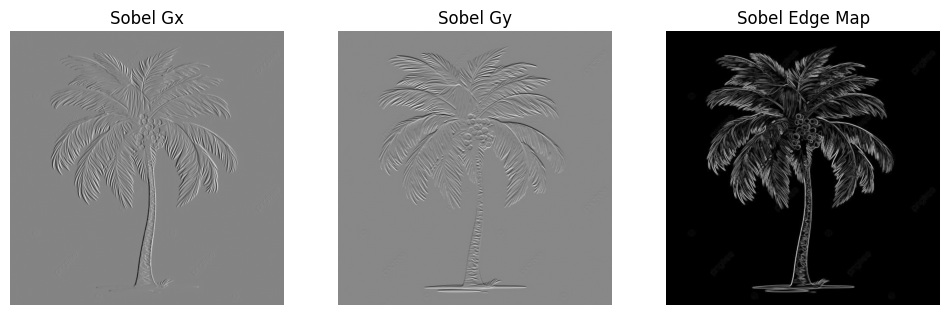

In [112]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(Gx, cmap='gray')
plt.title("Sobel Gx")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(Gy, cmap='gray')
plt.title("Sobel Gy")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(gradient_mag, cmap='gray')
plt.title("Sobel Edge Map")
plt.axis("off")

plt.show()

### Part C
Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
- lap = convolve(img, laplacian_kernel)
- sharp = img - lap * alpha where alpha ∈ [0.2, 1].
3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

In [113]:
laplacian_kernel = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]], dtype=np.float32)

lap = convolve(gray_np, laplacian_kernel)

alpha = 0.5   
sharp_lap_alpha = gray_np.astype(np.float32) - alpha * lap
sharp_lap_alpha = np.clip(sharp_lap_alpha, 0, 255).astype(np.uint8)

alpha = 1.0
sharp_lap_alpha1 = gray_np.astype(np.float32) - alpha * lap
sharp_lap_alpha1 = np.clip(sharp_lap_alpha1, 0, 255).astype(np.uint8)

In [114]:
# Doing the same thing using openCV function

lap_cv = cv2.filter2D(gray_np, cv2.CV_32F, laplacian_kernel)
sharp_cv = gray_np.astype(np.float32) - lap_cv
sharp_cv = np.clip(sharp_cv, 0, 255).astype(np.uint8)


In [115]:
# Comparing matrices
difference = np.abs(sharp_lap_alpha1.astype(int) - sharp_cv.astype(int))
max_diff = np.max(difference)

print("Maximum difference between NumPy and OpenCV output:", max_diff)

if max_diff == 0:
    print("NumPy and OpenCV outputs are Exactly the same")
else:
    print("There might exist Small numerical differences")


Maximum difference between NumPy and OpenCV output: 0
NumPy and OpenCV outputs are Exactly the same


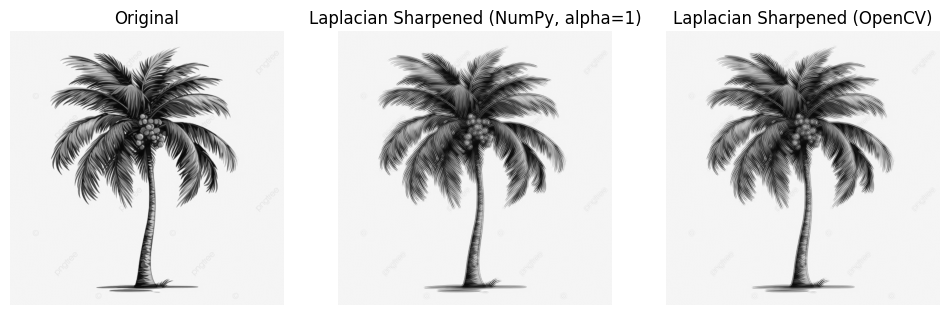

In [116]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray_np, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sharp_lap_alpha1, cmap='gray')
plt.title("Laplacian Sharpened (NumPy, alpha=1)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(sharp_cv, cmap='gray')
plt.title("Laplacian Sharpened (OpenCV)")
plt.axis("off")

plt.show()

Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: mask = img - blurred
3. Add scaled mask back: sharp = img + alpha * mask , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.

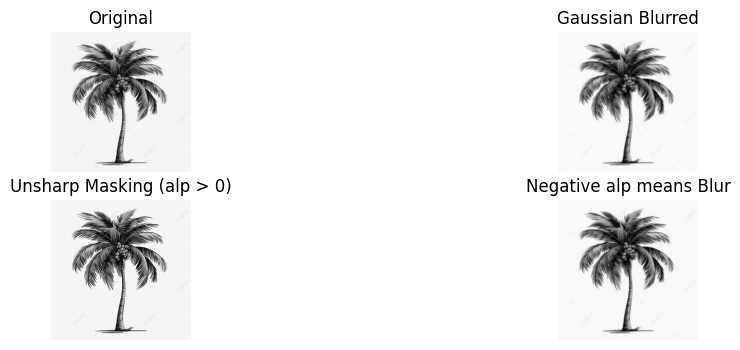

In [117]:
ksize = 7
sigma = 1.5

blurred = gaussian_blur_gray(gray_np, ksize, sigma)
# Larger ksize or sigma means stronger blur that isolates low-frequency contents so that edges can be extracted later.
mask = gray_np.astype(np.float32) - blurred.astype(np.float32)

alpha = 1.2   
sharp_unsharp = gray_np.astype(np.float32) + alpha * mask
sharp_unsharp = np.clip(sharp_unsharp, 0, 255).astype(np.uint8)

alpha_neg = -0.7
blur_from_negative_alpha = gray_np.astype(np.float32) + alpha_neg * mask
blur_from_negative_alpha = np.clip(blur_from_negative_alpha, 0, 255).astype(np.uint8)


plt.figure(figsize=(12,4))

plt.subplot(2,2,1)
plt.imshow(gray_np, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(sharp_unsharp, cmap='gray')
plt.title("Unsharp Masking (alp > 0)")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(blur_from_negative_alpha, cmap='gray')
plt.title("Negative alp means Blur")
plt.axis("off")

plt.show()


### Part D
Task - Frequency Analysis (LPF & HPF Verification)
- Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes. Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel

In [118]:
def magnitude_spectrum(img):
    f = np.fft.fft2(img.astype(np.float32))
    fshift = np.fft.fftshift(f)
    magnitude = np.abs(fshift)

    mag_spec = 20 * np.log(1 + magnitude)
    return mag_spec

In [119]:
ksize = 7
sigma = 1.5

blurred = gaussian_blur_gray(gray_np, ksize, sigma)

# We do Unsharp masking with adjustable alpha
alpha = 1.2   
mask = gray_np.astype(np.float32) - blurred.astype(np.float32)
sharp = gray_np.astype(np.float32) + alpha * mask
sharp = np.clip(sharp, 0, 255).astype(np.uint8)

In [120]:
mag_orig = magnitude_spectrum(gray_np)
mag_blur = magnitude_spectrum(blurred)
mag_sharp = magnitude_spectrum(sharp)

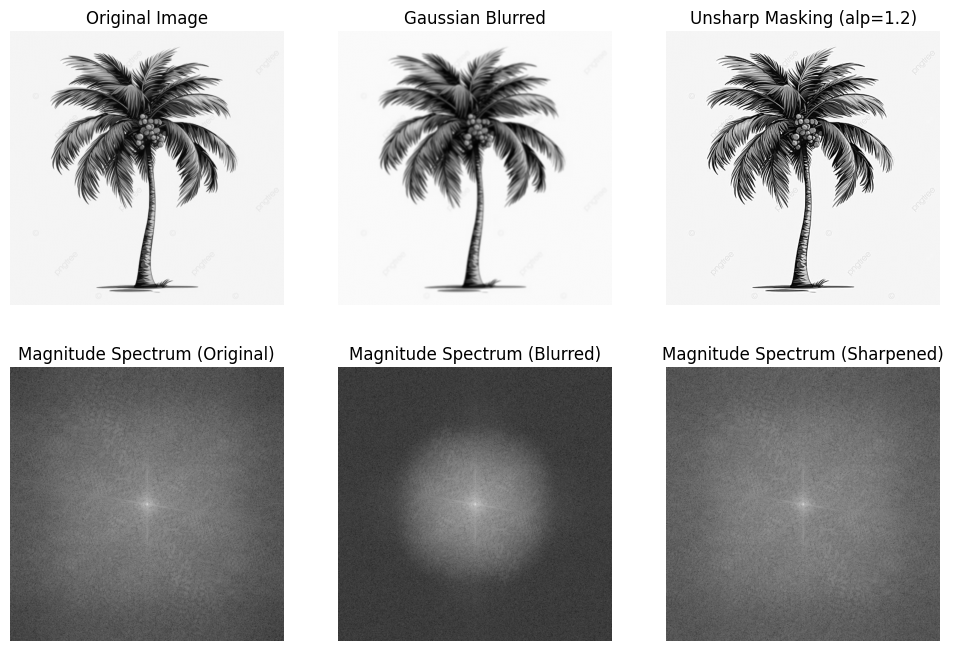

In [121]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(gray_np, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(sharp, cmap='gray')
plt.title(f"Unsharp Masking (alp={alpha})")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(mag_orig, cmap='gray')
plt.title("Magnitude Spectrum (Original)")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(mag_blur, cmap='gray')
plt.title("Magnitude Spectrum (Blurred)")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(mag_sharp, cmap='gray')
plt.title("Magnitude Spectrum (Sharpened)")
plt.axis("off")

plt.show()


# Part E

### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)
Instructions :

- At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.
### Hints :
* Yellow = (R high, G high, B low)
* Dark green = (G high, R low, B low)

### Steps:
1. Analyze the RGB values of green & yellow regions.
2. Create a custom kernel that responds strongly to change from green to yellow in:
- Red matrices of RGB
- Green matrices of RGB
- Optionally R - G difference
- Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.
- Combine the response maps.

### Get a clean outline around the leaf.

In [122]:
# Yellow leaf pixels:
#   R - HIGH
#   G - HIGH
#   B - LOW

# Green leaf pixels:
#   R - LOW
#   G - HIGH
#   B - LOW

#   The Biggest change when moving from green to yellow is in RED channel.
#   Also, (R - G) increases significantly near yellow boundaries.

In [123]:
local_image_path_2 = 'leaf_image.jpeg'

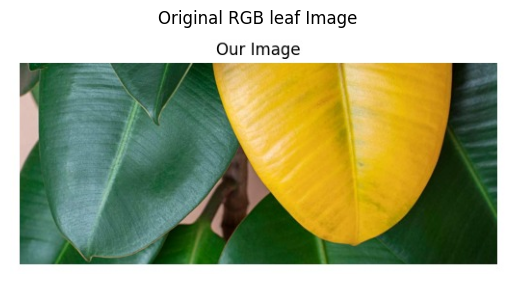

In [124]:
img_bgr_2 = cv2.imread(local_image_path_2)
img_rgb_2= cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb_2)
plt.title("Original RGB leaf Image")
plt.axis("off")
plt.show()

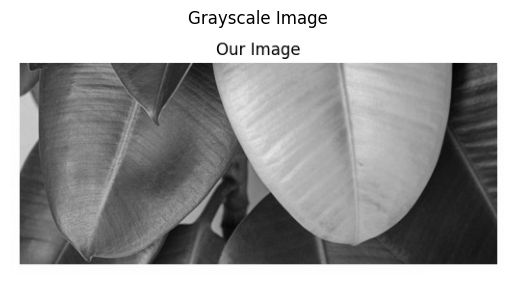

In [125]:
rgb_2_float = img_rgb_2.astype(np.float32)

# Grayscale Image
weights = np.array([0.299, 0.587, 0.114], dtype=np.float32)
gray_2_np = np.clip(np.dot(rgb_2_float, weights), 0, 255).astype('uint8')

 # Then we Convert back to uint8 (0–255 range)
gray_2 = gray_2_np.astype(np.uint8)

plt.imshow(gray_2, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

Custom edge kernel for detecting yellow-green boundaries

In [126]:
edge_kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]], dtype=np.float32)

In [127]:
R = img_rgb_2[:, :, 0].astype(np.float32)
G = img_rgb_2[:, :, 1].astype(np.float32)
B = img_rgb_2[:, :, 2].astype(np.float32)

# Computing Edge response on Red and Green channels and of the R-G difference as well.
edge_R = convolve(R, edge_kernel)
edge_G = convolve(G, edge_kernel)

RG_diff = R - G
edge_RG = convolve(RG_diff, edge_kernel)

combined_response = (
    1.5 * np.abs(edge_R) +
    1.0 * np.abs(edge_G) +
    2.0 * np.abs(edge_RG))

In [128]:
combined_response = combined_response / combined_response.max() * 255
combined_response = combined_response.astype(np.uint8)

threshold = 80
edge_map = combined_response.copy()
edge_map[edge_map < threshold] = 0


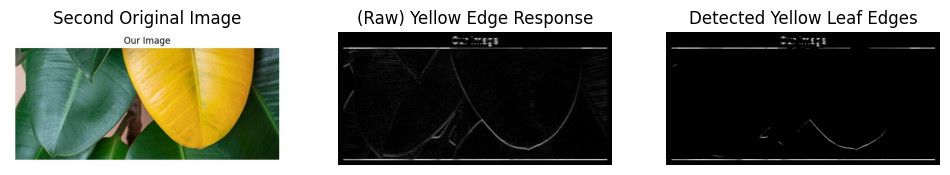

In [129]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb_2)
plt.title("Second Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(combined_response, cmap='gray')
plt.title("(Raw) Yellow Edge Response")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(edge_map, cmap='gray')
plt.title("Detected Yellow Leaf Edges")
plt.axis("off")

plt.show()